# REAL RACING 3 VEHICLES - OUTCOME 3 - Revision 1

### Welcome to my 3rd part of data analysis for Real Racing 3 vehicles!

So far, **two** parts have been completed and we've performed lots of data analyses and revealed many expected and/or interesting results that provided us great insights about the vehicles presented in the game.

Now, here we are for the **3rd part**! This time, my focus will be on **data visualization**. We know that a figure could tell us hundreds of words, right?

As always, let's load the necessary modules initially. Again, we're going to use the vehicle roster from **game version 9.0**:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**Important!:**  GitHub may cause some tables to have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the dataset during rendering. To avoid this issue, all values in `Price` that contain `$` should be changed before the analyses begin.

In [2]:
rr3_df = pd.read_csv('real_racing_3_vehicles_v9_0.csv')
for i in range(len(rr3_df)):
    if rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

If you remember the 2nd part, the last thing I did was to make a plot graph to show the breakdown of **count of career series eligibility** among all vehicles. Let me redo everything here as I left previously, but with a few changes:

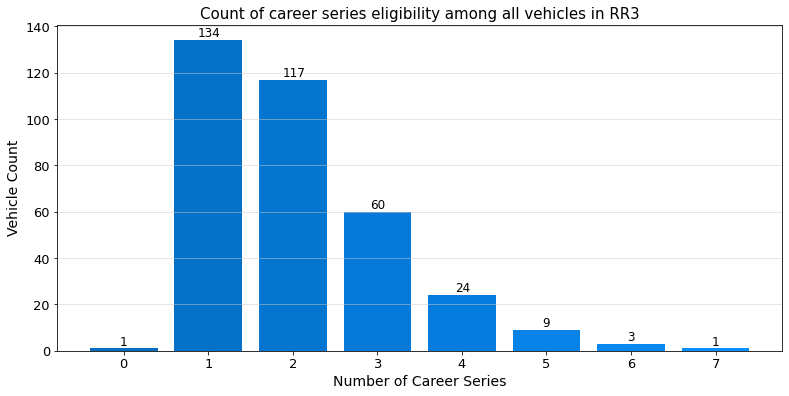

In [3]:
array_series = rr3_df['Series'].value_counts().sort_index()
c = ['#066cbf', '#0671c8', '#0675cf', '#0779d8', '#077cdf', '#0783e8', '#0888ef', '#0890ff']
plt.figure(figsize=(13,6))
plt.bar(range(8), array_series, color=c)
for i in range(len(array_series)):
    if array_series[i] >= 100:    plt.text(i-0.12, array_series[i]+1.5, array_series[i], fontsize=12)
    elif array_series[i] >= 10:   plt.text(i-0.08, array_series[i]+1.5, array_series[i], fontsize=12)
    else:   plt.text(i-0.05, array_series[i]+1.5, array_series[i], fontsize=12)
plt.title('Count of career series eligibility among all vehicles in RR3', fontsize=15)
plt.xlabel('Number of Career Series', fontsize=14)
plt.ylabel('Vehicle Count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y', color='#cccccc', alpha=0.6)
plt.show()

With a visualization like this, it becomes easy to interpret the circumstances. As we discovered, there are **134** vehicles that can be driven in a **single** career series. This number certainly gets **decreased** when the number of career series eligiblity increases, up to 7.

_If you wonder which vehicle had the most career series, check out the previous analysis parts..._

Strangely, there exists such a vehicle that does not have any eligible career series. We've revealed that it was **F1 Academy Car** which can only be driven in **F1 Daily Races** in the game. This means you've got to buy a **2020 Season F1 car** in order to continue further, or relive the moments **in the previous season**.

It's time to focus on other things for our RR3 vehicle dataset. Following the same task, secondly, let's make another **bar graph** for counting **the vehicle classes** individually:

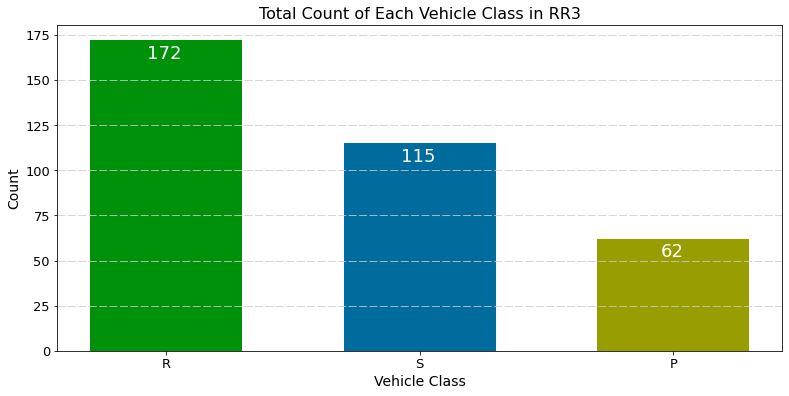

In [4]:
plt.figure(figsize=(13,6))
class_count = rr3_df['Class'].value_counts()
plt.bar(class_count.index, class_count.values, width=0.6, color=['#00910a', '#006c9e', '#999e00'])
plt.title('Total Count of Each Vehicle Class in RR3', fontsize=16)
for i in range(len(class_count)):
    if class_count[i] >= 100:   plt.text(i-0.075 ,class_count[i]-10, class_count[i], color='white', fontsize=18)
    else:   plt.text(i-0.05 ,class_count[i]-10, class_count[i], color='white', fontsize=18)
plt.xlabel('Vehicle Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y', dashes=(10,3), color='#cccccc')
plt.show()

As we've seen in the 2nd part of analysis, **R (Race) class** vehicles have the most appearance in the vehicle roster (with **172**). But, considering the current shape of the game, the career series (under the name, _Road Collection_ ) contains several vehicles from that class that are also found in _Motorsports_ series.

About the rest, there are **115 S (Super) class** vehicles, which they are generally more expensive than **P-class** vehicles that their numbers are siginificantly less than other classes, only **62**.

NEXT, how about the count of **purchase type** for all vehicles in the current version?

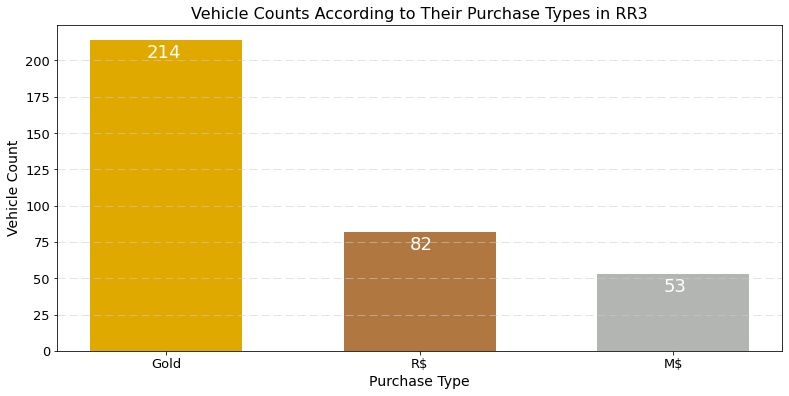

In [5]:
plt.figure(figsize=(13,6))
gold_c = rr3_df['Price'].str.contains('Gold').values.sum()
rdollar_c = rr3_df['Price'].str.contains('Rdollar').values.sum()
mdollar_c = rr3_df['Price'].str.contains('Mdollar').values.sum()
plt.bar(['Gold', 'R\$', 'M\$'], [gold_c, rdollar_c, mdollar_c], width=0.6, color=['#e0a900', '#b07741', '#b2b5b1'])
plt.text(-0.075, gold_c-12, gold_c, color='white', fontsize=18)
plt.text(0.96, rdollar_c-12, rdollar_c, color='white', fontsize=18)
plt.text(1.96, mdollar_c-12, mdollar_c, color='white', fontsize=18)
plt.title('Vehicle Counts According to Their Purchase Types in RR3', fontsize=16)
plt.xlabel('Purchase Type', fontsize=14)
plt.ylabel('Vehicle Count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y', color='#cccccc', alpha=0.7, dashes=(10,5))
plt.show()

Yeah, from the figure above, we can imply that there are lots of veicles purchasable with **Gold**, more than 200! When you progress further in the career series, then you'll encounter more vehicles that require Gold initially to be able to drive. Moreover, new vehicles from **Road Collection** in every new patch are set to be bought with Gold. That's why the number of purchase type with **R$** was far from less!

Of course, since the introduction of **2019 Season Formula 1 cars**, we've been introduced with the **M\$** currency type, which has its own daily limit (**250,000 M\$** maximum). After 1 year, many more vehicles with this purchase type have joined to the game, and now the number has been increased up to **53**.

Well, for a more complicated count, I'd like to **combine these two criterions**: The count is performed by comparing **the classes against their purchase types**. To make it work, I have to create another column to store only the purchase type as string (e.g. only `Rdollar`, `Gold` and `Mdollar`).

Then, a pivot table will be useful here:

In [6]:
def get_purchase_type(x):
    if x[-7:] == 'Rdollar':    return 'Rdollar'
    elif x[-4:] == 'Gold':     return 'Gold'
    elif x[-7:] == 'Mdollar':  return 'Mdollar'
rr3_df['Purchase Type'] = rr3_df['Price'].apply(get_purchase_type)

In [7]:
cls_pt_table = rr3_df.pivot_table(index=['Class'], columns=['Purchase Type'], values=['Model'], aggfunc='count').fillna(0)
cls_pt_table.astype(int)

Model                
Purchase Type  Gold Mdollar Rdollar
Class                              
P                34       0      28
R               101      53      18
S                79       0      36

**That's more like it!** That table gave us much more insights for _the count of classes against the purchase types of the vehicles!_ 

Compare this with the bar graphs above; do these numbers match when summed?

Meanwhile, this cross-counting technique reveals another fact: Vehicles that are purchasable with **M\$** are all from **R class!** Plus, **Gold purchase-type** is dominant among all classes.

_Now, time to represent them together with a nice visualization:_

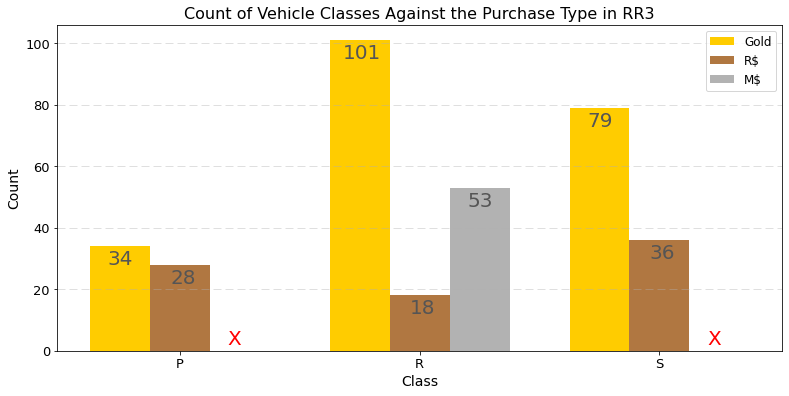

In [8]:
x = np.array([0, 0.5, 1])
fig, ax = plt.subplots(figsize=(13,6))
width = 0.125
ax.bar(x - width, cls_pt_table.loc[:,('Model','Gold')].values, width, label='Gold', color='#ffcc00')
ax.bar(x, cls_pt_table.loc[:,('Model','Rdollar')].values, width, label='R$', color='#b07741')
ax.bar(x + width, cls_pt_table.loc[:,('Model','Mdollar')].values, width, label='M$', color='#b2b2b2')
for i in range(3):
    if cls_pt_table.iloc[i,0] >= 100:
        plt.text(i/2-0.16, cls_pt_table.iloc[i,0]-6, int(cls_pt_table.iloc[i,0]), fontsize=20, color='#555555')
    else:
        plt.text(i/2-0.15, cls_pt_table.iloc[i,0]-6, int(cls_pt_table.iloc[i,0]), fontsize=20, color='#555555')
    plt.text(i/2-0.02, cls_pt_table.iloc[i,2]-6, int(cls_pt_table.iloc[i,2]), fontsize=20, color='#555555')
    if cls_pt_table.iloc[i,1] == 0:
        plt.text(i/2+0.1, cls_pt_table.iloc[i,1]+2, "X", fontsize=20, color='r')
    else:
        plt.text(i/2+0.1, cls_pt_table.iloc[i,1]-6, int(cls_pt_table.iloc[i,1]), fontsize=20, color='#555555')
plt.title('Count of Vehicle Classes Against the Purchase Type in RR3', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 0.5, 1.0], ['P', 'R', 'S'], fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y', alpha=0.5, dashes=(10,5))
plt.legend(fontsize=12)
plt.show()

_Yep, this looks great! We successfully converted the above table into a bar graph with multiple values in it!_

By examining the table and the graph, our implication should be that you must have lots of gold in hand to be able to enjoy the races with **R-class** vehicles! There are 101 of them. For **S-class**, Gold is still dominating (which is 79). For **P-class**, there are not much gap between Gold and R\$ (36 vs 28).

Alternatively, now I want to do the same for **Class** against **Drive Type** together. However, some _data wrangling_ is needed for **Type**, such that I have to get rid of `(RHD)` and `(MHD)` as they are not necessary:

In [9]:
rr3_df['Type'] = rr3_df['Type'].apply(lambda x: x[:2])

This should look good. Now, let's carry this out:

In [10]:
cls_dt_table = rr3_df.pivot_table(index=['Class'], columns=['Type'], values=['Model'], aggfunc='count', margins=True).fillna(0)
cls_dt_table.astype(int)

Model                             
Type     F4 FF   FR  M4   MR R4  RR  All
Class                                   
P         8  6   39   0    5  0   4   62
R         4  2   61   8   87  0  10  172
S         4  1   32  18   41  2  17  115
All      16  9  132  26  133  2  31  349

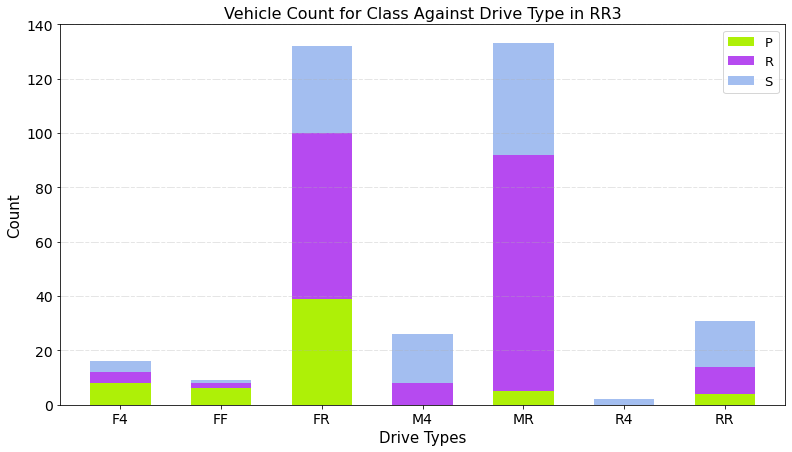

In [11]:
width = 0.25
table_columns = cls_dt_table.columns.levels[1][1:]
w = 0.6
plt.figure(figsize=(13,7))
plt.axis([-0.6,6.6,0,140])
plt.bar(table_columns, cls_dt_table.loc['P'][:7], label='P', color='#aef007', width=w)
plt.bar(table_columns, cls_dt_table.loc['R'][:7], bottom=cls_dt_table.loc['P'][:7], label='R', color='#b64af0', width=w)
plt.bar(table_columns, cls_dt_table.loc['S'][:7], bottom=(cls_dt_table.loc['P'][:7]+cls_dt_table.loc['R'][:7]), 
        label='S', color='#a3bef0', width=w)
plt.title('Vehicle Count for Class Against Drive Type in RR3', fontsize=16)
plt.xlabel('Drive Types', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13)
plt.grid(axis='y', alpha=0.4, dashes=(10,2,5,2))
plt.show()

Here, this time **a stacked bar** is a great visualization for this purpose.

From the figure above, it seems that **MR drive type** has the most density **(133)** among all vehicles in RR3; almost tied with **FR drive type** with just 1 vehicle less. In addition, **R-class** is favored for both types.

About the highest count of class/drive type combination, we can come across **87** vehicles as **R-class with MR type** (confirm this with your own eyes!). Last but not the least, I find these combinations as the rarest ones: **R-class/FF**, **S-class/FF** and **S-class/R4**.

In the previous part of the analysis, we've counted **how many vehicles an existing manufacturer had** in RR3, but only output the top 10. Now, let's get the big picture to see everything, with **horizontal bar** figure.

There are two things to consider in advance:

* **Mercedes-Benz** and **Mercedes-AMG** were combined as **Mercedes** to avoid the distiction.
* **Formula 1** and **Formula E** are included although they are not individual manufacturers, rather _motorsport disciplines_ at all.

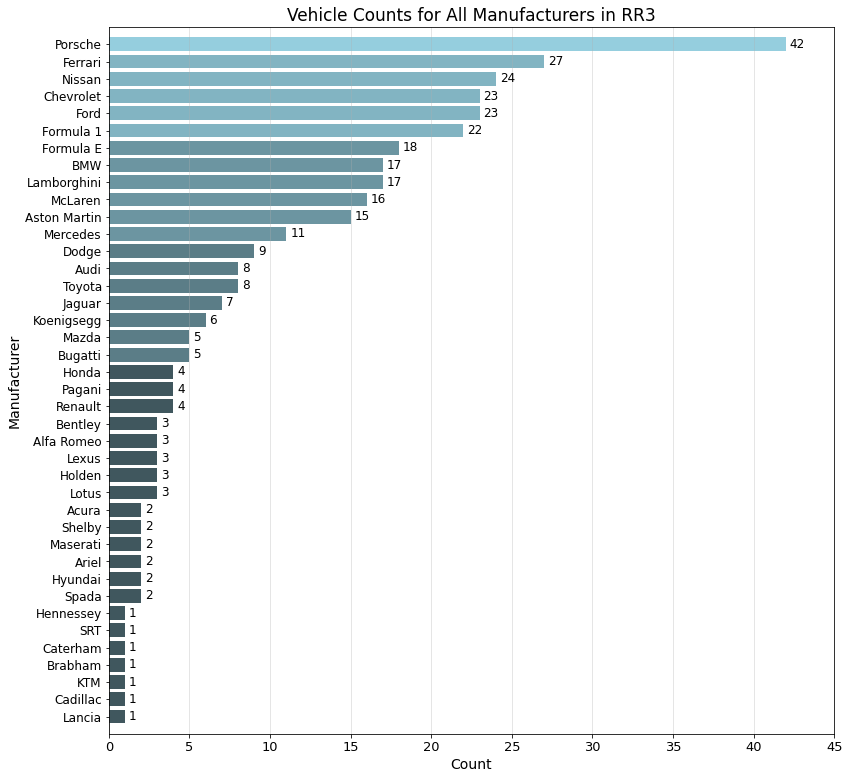

In [12]:
rr3_df['Manufacturer'].replace('Mercedes-Benz', 'Mercedes', inplace=True)
rr3_df['Manufacturer'].replace('Mercedes-AMG', 'Mercedes', inplace=True)
manu_count = rr3_df['Manufacturer'].value_counts(ascending=True)
c = []
for v in manu_count:
    if v >= 40:    c.append('#95cede')
    elif v >= 20:  c.append('#82b4c2')
    elif v >= 10:  c.append('#6c95a1')
    elif v >= 5:   c.append('#5b7d87')
    else:    c.append('#40575e')
plt.figure(figsize=(13,13))
plt.axis([0,45,-1,40])
plt.barh(manu_count.index, manu_count, color=c)
for i in range(len(manu_count)):
    plt.text(manu_count[i]+0.25, i-0.2, manu_count[i], fontsize=12)
plt.title("Vehicle Counts for All Manufacturers in RR3", fontsize=17)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Manufacturer", fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.grid(axis='x', alpha=0.4)
plt.show()

Superb! From this big picture, there is no doubt that **Porsche** is the most favorite manufacturer by the game, with over **40 vehicles** can be driven. The runner-up is **Ferrari** with 27. Then, **Nissan**, **Ford** and **Chevrolet** with over 20.

**Formula 1** and **Formula E** together contain 40 vehicles to race in their own series; taking **6th** and **7th** places overall, respectively.

Next, several popular manufacturers can be seen: **BMW**, **Lamborghini**, **McLaren**, **Aston Martin**, **Mercedes**; having more than 10 vehicles in common.

Besides, these manufacturers are represented with only **one** vehicle: **KTM**, **Brabham**, **Caterham**, **Hennessey**, **SRT**, **Lancia**, **Cadillac**.

Continuing our EDA of Real Racing 3, we already know that all vehicle stats are stored as numeric values. These are **Top Speed**, **Acceleration**, **Braking** and **Grip**.

How about creating the frequencies of each stat with **histograms**?

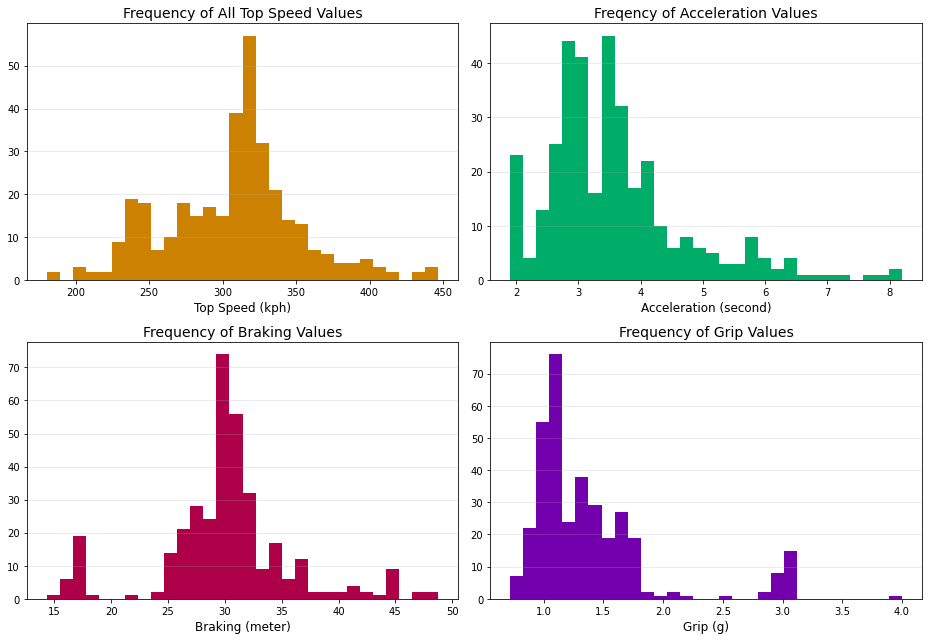

In [13]:
plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
plt.title("Frequency of All Top Speed Values", fontsize=14)
plt.hist(rr3_df['Top Speed'], bins=30, color='#cc8100')
plt.xlabel('Top Speed (kph)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.subplot(2,2,2)
plt.title("Freqency of Acceleration Values", fontsize=14)
plt.hist(rr3_df['Acceleration'], bins=30, color='#00ad68')
plt.xlabel('Acceleration (second)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.subplot(2,2,3)
plt.title("Frequency of Braking Values", fontsize=14)
plt.hist(rr3_df['Braking'], bins=30, color='#ad0048')
plt.xlabel('Braking (meter)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.subplot(2,2,4)
plt.title("Frequency of Grip Values", fontsize=14)
plt.hist(rr3_df['Grip'], bins=30, color='#7300ad')
plt.xlabel('Grip (g)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

They all look great! Here are the remarkable observations from these outcomes:

* **Top Speed:** Almost a regular bell curve; over **50 vehicles** have top speeds of around 320 kph.
* **Acceleration:** Many values are aligned to the left side; thus many vehicles have accelerations less than 4 seconds.
* **Braking:** Another bell curve can be seen, but slightly irregular than Top Speed; more than **70 vehicles** have braking performance at around 30 meters.
* **Grip:** We come across values lie to the left side again; it is very likely to see lots of vehicles with 0.9-1.8 g cornering capability in a **broad interval**, and 1.0-1.15 g in a **narrow interval**.

In addition to these histograms, let's create more, including **PR**, **Service Cost** and **Service Time**:

_Hotfix: Service Cost of Aston Martin Valkyrie is now available --> 2090 R$_

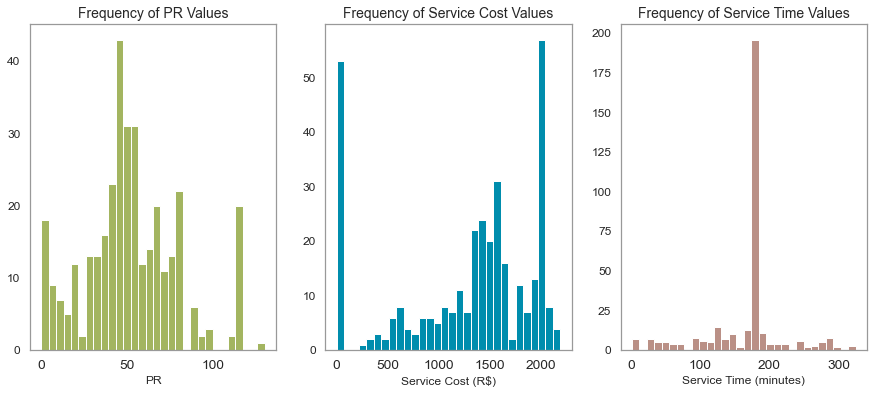

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title("Frequency of PR Values", fontsize=14)
plt.hist(rr3_df['PR'], bins=30, color='#a3b560')
plt.xlabel("PR", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.subplot(1,3,2)
plt.title("Frequency of Service Cost Values", fontsize=14)
plt.hist(rr3_df['Service Cost'], bins=30, color='#008dad')
plt.xlabel("Service Cost (R$)", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.subplot(1,3,3)
plt.title("Frequency of Service Time Values", fontsize=14)
plt.hist(rr3_df['Service Time'], bins=30, color='#ba9086')
plt.xlabel("Service Time (minutes)", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

What can we say about these **histograms** above? It is certain that one can easily see those very tall rods:

* **PR:** There is higher chance to encounter vehicles with PR between **40.0-60.0**. Note that the rod that has risen to 20 at around **115.0 PR** due to currently existing **Formula 1 vehicles**. 
* **Service Cost:** The values are more likely to lie in the right side; most values are coming from around **2000 R\$**. However, all vehicles with M\$ purchase-type can be serviced **at no cost** and thus, don't be surprised why the corresponding rod is so tall like this (the count must be 53).
* **Service Time:** This didn't make me amazed at all, as almost **200 vehicles** have a 180-minute service time. The rest is  not evenly distributed, of course.

 By taking the different perspective, why not creating **ECDFs (Empirical Cumulative Distribution Functions)**?
 
 Again, let's take the values from vehicle stats:

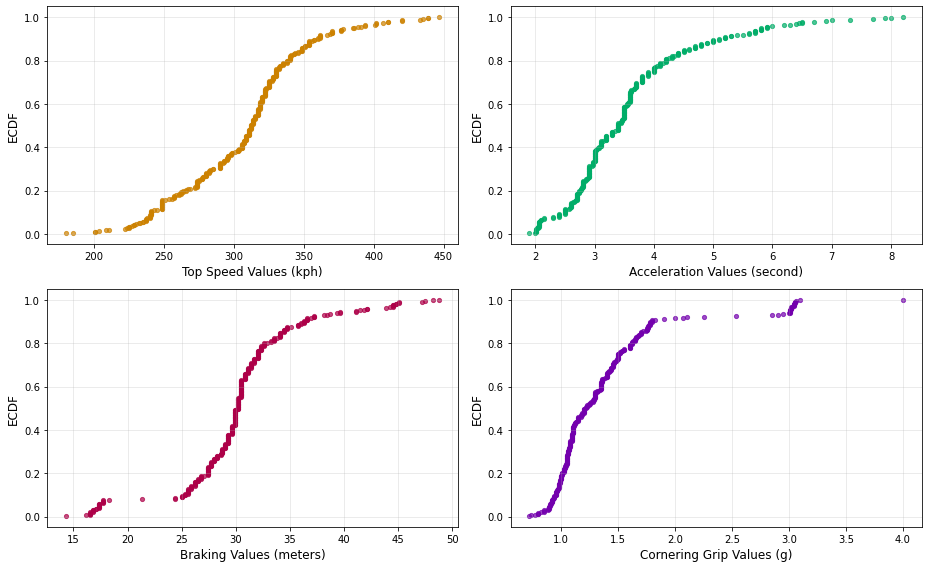

In [15]:
# The main function to create the ECDF
def ECDF(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
x_speed, y_speed = ECDF(rr3_df['Top Speed'])
plt.scatter(x_speed, y_speed, marker='.', color='#cc8100', s=70, alpha=0.7)
plt.xlabel('Top Speed Values (kph)', fontsize=12)
plt.ylabel('ECDF',fontsize=12)
plt.grid(alpha=0.3)
plt.subplot(2,2,2)
x_acc, y_acc = ECDF(rr3_df['Acceleration'])
plt.scatter(x_acc, y_acc, marker='.', color='#00ad68', s=70, alpha=0.7)
plt.xlabel('Acceleration Values (second)', fontsize=12)
plt.ylabel('ECDF',fontsize=12)
plt.grid(alpha=0.3)
plt.subplot(2,2,3)
x_brake, y_brake = ECDF(rr3_df['Braking'])
plt.scatter(x_brake, y_brake, marker='.', color='#ad0048', s=70, alpha=0.7)
plt.xlabel('Braking Values (meters)', fontsize=12)
plt.ylabel('ECDF',fontsize=12)
plt.grid(alpha=0.3)
plt.subplot(2,2,4)
x_grip, y_grip = ECDF(rr3_df['Grip'])
plt.scatter(x_grip, y_grip, marker='.', color='#7300ad', s=70, alpha=0.7)
plt.xlabel('Cornering Grip Values (g)', fontsize=12)
plt.ylabel('ECDF',fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Here are the implications we can observe from the figure above:

* Most of the vehicles have the top speed of between **300 and 350** kph (pay attentiton to the dots). Besides, in general, **over 80%** of the vehicles have **less than 350 kph** top speed.
* For acceleration, the related dots rapidly rise up in the left side; **nearly 80%** of the vehicles in the game have **less than 4 seconds** of accelerations. Remarkably, some small groups of dots can appear vertically as they have the same acceleration values.
* Speaking of braking values, again an almost-regular distribution of values can be seen, though some disconnections exist. Vehicles most likely have around **30 meters** of braking performance. Note the situation in the bottom left; that's because **all Formula 1 vehicles**, plus a few in the Road Collection, have very stong braking capabilities (under 20 meters).
* The distribution of values for cornering grip is somewhat similar to the ones in acceleration. Most vehicles have between **0.9-1.1 g**and this is getting slightly less when going up to **1.8 g**. Again, don't be surprised as **all F1** and similar vehicles have around **3.0 g**, thus the dots gathering around there consequently. Plus, an outlier exists whose value is exatly **4.0 g**! _If you'd like to know which one had this extreme value, check out the previous analysis..._

All in all, these strongly support the statements we've made for the corresponding **histograms** above...

Next, can we find any correlation with **PR** values if we combine these ECDFs above, through our eyes?

For this to work, all these values above, including PR, **must be normalized**! After that, here is the output:

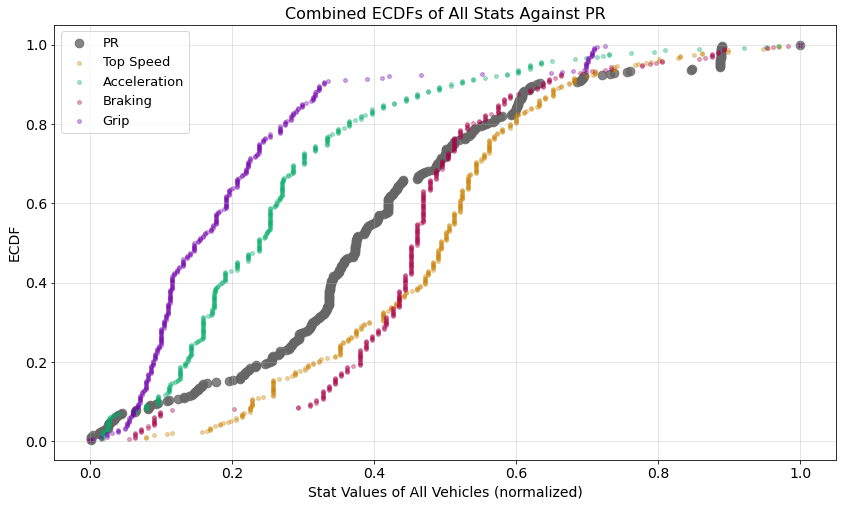

In [16]:
x_pr, y_pr = ECDF(rr3_df['PR'])
x_pr /= x_pr.max()
x_speed = x_speed.astype('float64')
x_speed -= x_speed.min()
x_speed /= x_speed.max()
x_acc -= x_acc.min() 
x_acc /= x_acc.max()
x_brake -= x_brake.min()
x_brake /= x_brake.max()
x_grip -= x_grip.min()
x_grip /= x_grip.max()
plt.figure(figsize=(14,8))
plt.scatter(x_pr, y_pr, marker='.', color='#666666', s=300, label='PR', alpha=0.8)
plt.scatter(x_speed, y_speed, marker='.', color='#cc8100', s=60, label='Top Speed', alpha=0.35)
plt.scatter(x_acc, y_acc, marker='.', color='#00ad68', s=60, label='Acceleration', alpha=0.35)
plt.scatter(x_brake, y_brake, marker='.', color='#ad0048', s=60, label='Braking', alpha=0.35)
plt.scatter(x_grip, y_grip, marker='.', color='#7300ad', s=60, label='Grip', alpha=0.35)
plt.title('Combined ECDFs of All Stats Against PR', fontsize=16)
plt.xlabel('Stat Values of All Vehicles (normalized)', fontsize=14)
plt.ylabel('ECDF', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13)
plt.grid(alpha=0.4)
plt.show()

Hmmm, after normalizing everything here, it might be weird at first!

Anyway, for this ECDF, from **10%** up to **75%**, the **PR** value roughly stay in the middle when compared to 4 other distinctive stat values. 

For a particular PR in that range mentioned above, **grip** and **acceleration** are on the left; **braking** and **top speed** are on the right. In other words, while determining the PR, in my opinion, braking and top speed have stronger effects while grip and acceleration have weaker. _Well, that's a bit confusing, but a good attempt to get it here, right?_

After the ECDF operation, now I'd like to see the **correlations** between these 4 stat groups of values... Let's tackle them all by creating plots individually and find their relationships in terms of _positivity_ or _negativity:_

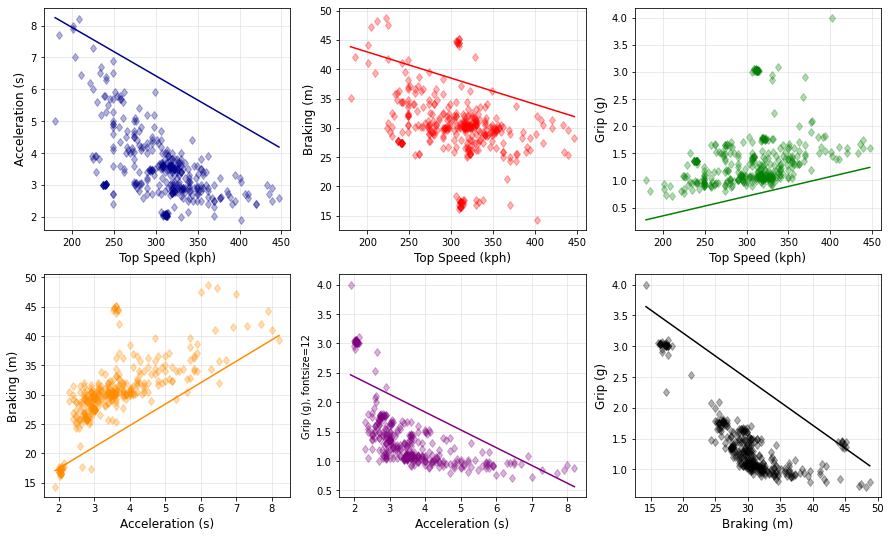

In [17]:
top_speed = rr3_df['Top Speed'].values
acc = rr3_df['Acceleration'].values
braking = rr3_df['Braking'].values
grip = rr3_df['Grip'].values
plt.figure(figsize=(15,9))
plt.subplot(2,3,1)
z = np.polyfit(top_speed, acc, 1)
plt.plot(top_speed, acc, marker='d', linestyle='none', alpha=0.3, color='darkblue')
plt.plot([top_speed.min(), top_speed.max()], [z[1], z[1]+(z[0]*(top_speed.max()-top_speed.min()))], color='darkblue')
plt.xlabel('Top Speed (kph)', fontsize=12)
plt.ylabel('Acceleration (s)', fontsize=12)
plt.grid(alpha=0.3)
plt.subplot(2,3,2)
z = np.polyfit(top_speed, braking, 1)
plt.plot(top_speed, braking, marker='d', linestyle='none', alpha=0.3, color='red')
plt.plot([top_speed.min(), top_speed.max()], [z[1], z[1]+(z[0]*(top_speed.max()-top_speed.min()))], color='red')
plt.xlabel('Top Speed (kph)', fontsize=12)
plt.ylabel('Braking (m)', fontsize=12)
plt.grid(alpha=0.3)
plt.subplot(2,3,3)
z = np.polyfit(top_speed, grip, 1)
plt.plot(top_speed, grip, marker='d', linestyle='none', alpha=0.3, color='green')
plt.plot([top_speed.min(), top_speed.max()], [z[1], z[1]+(z[0]*(top_speed.max()-top_speed.min()))], color='green')
plt.xlabel('Top Speed (kph)', fontsize=12)
plt.ylabel('Grip (g)', fontsize=12)
plt.grid(alpha=0.3)
plt.subplot(2,3,4)
z = np.polyfit(acc, braking ,1)
plt.plot(acc, braking, marker='d', linestyle='none', alpha=0.3, color='darkorange')
plt.plot([acc.min(), acc.max()], [z[1], z[1]+(z[0]*(acc.max()-acc.min()))], color='darkorange')
plt.xlabel('Acceleration (s)', fontsize=12)
plt.ylabel('Braking (m)', fontsize=12)
plt.grid(alpha=0.3)
plt.subplot(2,3,5)
z = np.polyfit(acc, grip, 1)
plt.plot(acc, grip, marker='d', linestyle='none', alpha=0.3, color='purple')
plt.plot([acc.min(), acc.max()], [z[1], z[1]+(z[0]*(acc.max()-acc.min()))], color='purple')
plt.xlabel('Acceleration (s)', fontsize=12)
plt.ylabel('Grip (g), fontsize=12')
plt.grid(alpha=0.3)
plt.subplot(2,3,6)
z = np.polyfit(braking, grip, 1)
plt.plot(braking, grip, marker='d', linestyle='none', alpha=0.3, color='black')
plt.plot([braking.min(), braking.max()], [z[1], z[1]+(z[0]*(braking.max()-braking.min()))], color='black')
plt.xlabel('Braking (m)', fontsize=12)
plt.ylabel('Grip (g)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

It is great to examine all these correlations in just one plotting group, isn't it? 

At the same time, let's get the **correlation coefficients (Pearson)** in numerical way:

In [18]:
tspeed_values = rr3_df['Top Speed'].values
acc_values = rr3_df['Acceleration'].values
brake_values = rr3_df['Braking'].values
grip_values = rr3_df['Grip'].values
print("** CORRELATIONS **")
print("Top Speed & Acceleration: {:.3f}".format(np.corrcoef(tspeed_values, acc_values)[0,1]))
print("Top Speed & Braking:      {:.3f}".format(np.corrcoef(tspeed_values, brake_values)[0,1]))
print("Top Speed & Grip:         {:.3f}".format(np.corrcoef(tspeed_values, grip_values)[0,1]))
print("Acceleration & Braking:   {:.3f}".format(np.corrcoef(acc_values, brake_values)[0,1]))
print("Acceleration & Grip:      {:.3f}".format(np.corrcoef(acc_values, grip_values)[0,1]))
print("Braking & Grip:           {:.3f}".format(np.corrcoef(brake_values, grip_values)[0,1]))

** CORRELATIONS **
Top Speed & Acceleration: -0.621
Top Speed & Braking:      -0.357
Top Speed & Grip:         0.302
Acceleration & Braking:   0.717
Acceleration & Grip:      -0.616
Braking & Grip:           -0.778


Compare both the values here and the corresponding plots, including the lines going upward or downward. They look very sensible, yes?

It is definitely right to say that _Top Speed & Acceleration_ are **negatively correlated** with a magnitude of 0.62, with regards to the numerical values. That is, if the vehicle can reach **higher top speed**, it is expected to have **faster acceleration**, thus **lower values**. This is the claim we get...

Similarly, _Top Speed & Braking,_ _Acceleration & Grip_ and _Braking & Grip_ are also **negatively correlated** with different magnitudes as seen above. (Respective values are -0.357, -0.616, -0.778)

On the other hand, these two pairs are **positively correlated**: _Top Speed & Grip_ and _Acceleration & Braking_ with magnitude of 0.302 and 0.717, respectively. So, if one value is increasing, then it is expected for the other one to go up, where greater effect can be seen for the second pair.

Now, can we consolidate everything such that their correlations are packed together and color-coded? Seaborn's **heat map** will help us greatly for that! This time, it contains three additional columns: **PR**, **Service Cost** and **Service Time**.

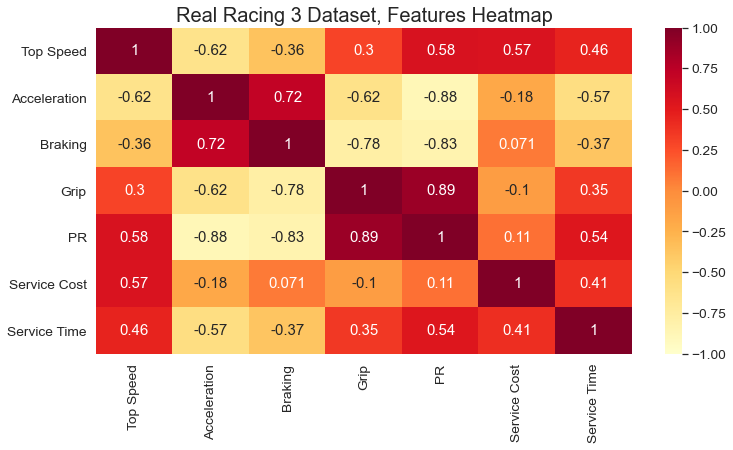

In [19]:
rr3_df_vehicle_values = rr3_df[['Top Speed', 'Acceleration', 'Braking', 'Grip', 'PR', 'Service Cost', 'Service Time']]
plt.figure(figsize=(12,6))
sns.set(font_scale=1.25)
sns.heatmap(rr3_df_vehicle_values.corr(), cmap='YlOrRd', annot=True, vmin=-1, vmax=1)
plt.title('Real Racing 3 Dataset, Features Heatmap', fontsize=20)
plt.show()

**Excellent!** All these correlation values are beautifully here in **a heat map**. 

For the first 4 columns, **they should be roughly the same** as the things we calculated above. Plus, inspect the newly added columns in terms of their correlations against the existing ones...

Interestingly, **PR** has **much higher** correlation magnitudes especially when compared to _Acceleration,_ _Braking_ and _Grip;_ being close to **0.9** positively and negatively.

Lastly, I want to generate some **box plots**, seperated by the vehicle classes.

Let's see the **mean**, **median**, **quantiles** and **possible outliers** of these columns visually:

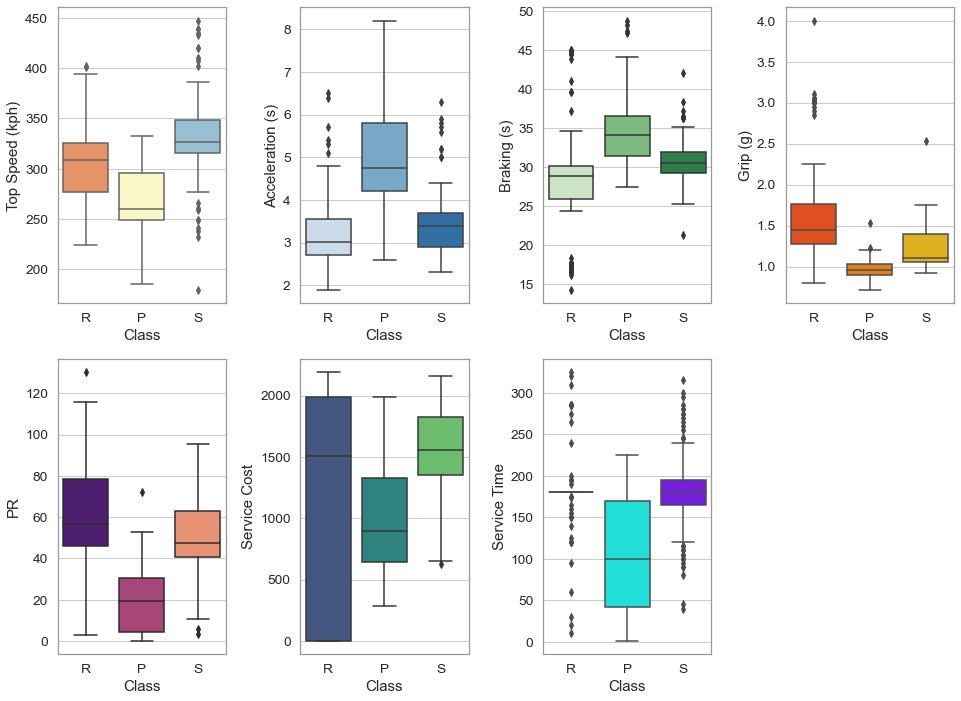

In [20]:
plt.figure(figsize=(13.6,10))
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#999999'
plt.subplot(2,4,1)
sns.boxplot(rr3_df['Class'], rr3_df['Top Speed'], palette='RdYlBu')
plt.ylabel('Top Speed (kph)')
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,2)
sns.boxplot(rr3_df['Class'], rr3_df['Acceleration'], palette='Blues')
plt.ylabel('Acceleration (s)')
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,3)
sns.boxplot(rr3_df['Class'], rr3_df['Braking'], palette='Greens')
plt.ylabel('Braking (s)')
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,4)
sns.boxplot(rr3_df['Class'], rr3_df['Grip'], palette='autumn')
plt.ylabel('Grip (g)')
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,5)
sns.boxplot(rr3_df['Class'], rr3_df['PR'], palette='magma')
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,6)
sns.boxplot(rr3_df['Class'], rr3_df['Service Cost'], palette='viridis')
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,7)
sns.boxplot(rr3_df['Class'], rr3_df['Service Time'], palette='hsv')
plt.grid(axis='y', color='#cccccc')
plt.tight_layout()
plt.show()

These box plots should give **much more valuable insights** and the separation by classes enabled us to identify the characteristics of vehicles much more! **Fantastic!**

Let me tell you what these lines in and out of these boxes mean, in case you forgot:

- The bottom line outside of the colored box represents the **minimum confidence interval** value.
- The bottom line within the colored box represents the **25th percentile** value.
- The middle line within the colored box represents the **median** value (50th percentile).
- The top line within the colored box represents the **75th percentile** value.
- The top line outside of the colored box represents the **maximum confidence interval** value.
- And, the black diamonds are **outliers**!

We can come across many outliers out there especially with some combinations. For example: _Top Speed of S-class,_ _Acceleration of R-class,_ _Braking of R-class,_ 

Interestingly, **Service Time in R-class** has the most outliers among all here! That might be because **180-minute** duration is dominant, hence no confidence interval and any other values were marked as outliers! This is somewhat similar in **Service Time in S-class**, but there does exist a confidence interval, nevertheless.

The corresponding figure for **Service Cost** has almost no outlier, just one! In addition, the R-class' colored box is so big, and it contains every other values whatsoever.

## All right, folks! That concludes the 3rd part of analysis for Real Racing 3 Vehicles outcomes!

### All in all, we put the emphasis on data visualization here.

**I hope you enjoyed a lot while observing the plots and reading the analyses I've actualized.**

### **Until next time, as always keep racing!!!**